In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc

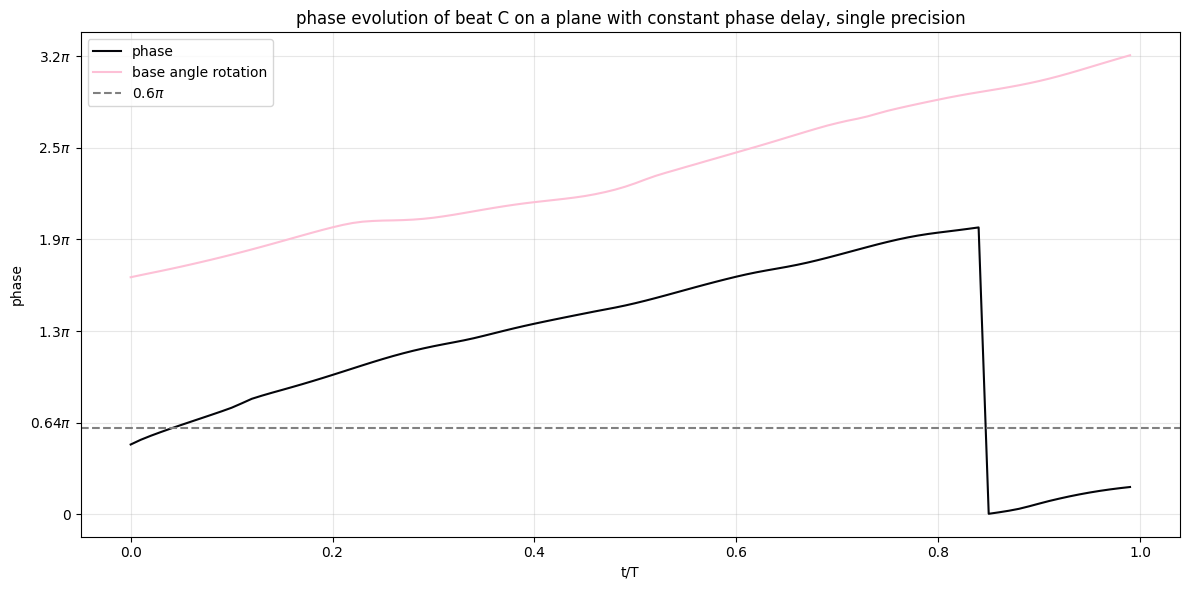

In [2]:
from matplotlib.ticker import FuncFormatter

path_1_c = '../data/beat_C_single_blobs_sphere_random_ic_tilt2/20260203/ciliate_216fil_40962blob_8.00R_0.1500torsion_0.1454tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_true_states.dat'

data = np.loadtxt(path_1_c)
time = data[:100, 0] / 500.0
psi1 = np.mod(data[:100, 2], 2*np.pi)
psi2 = data[:100, 3]

def multiple_pi_formatter(x, pos):
  frac = x / np.pi
  if np.isclose(frac, 0):
    return "0"
  elif np.isclose(frac, 1):
    return r"$\pi$"
  elif np.isclose(frac, -1):
    return r"$-\pi$"
  elif np.isclose(frac, 2):
    return r"$2\pi$"
  elif np.isclose(frac, -2):
    return r"$-2\pi$"
  else:
    return r"${0:.2g}\pi$".format(frac)

# Create a single figure with both plots
plt.figure(figsize=(12, 6))
plt.plot(time, psi1, label='phase', linestyle='-', color=cmc.batlowKS(0))
plt.plot(time, psi2, label='base angle rotation', linestyle='-', color=cmc.batlowKS(1))

# Add horizontal line at y = 0.3 * 2 * pi
plt.axhline(y=0.3 * 2 * np.pi, color='gray', linestyle='--', label=r'$0.6\pi$')

plt.xlabel('t/T')
plt.ylabel('phase')
plt.title('phase evolution of beat C on a plane with constant phase delay, single precision')
plt.legend()
plt.grid(True, alpha=0.3)

# Apply the multiple_pi_formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(multiple_pi_formatter))

plt.tight_layout()
plt.show()